## Sine 함수 회귀분석 (Sine Regression)

In [1]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__) 

2.3.0


## 데이터 생성

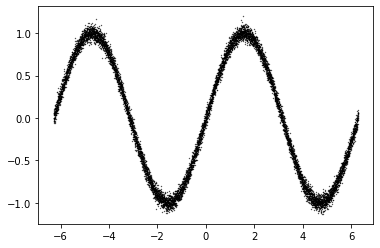

In [3]:
# generate the data
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = np.sin(inputs) + 0.05 * np.random.normal(size=[len(inputs),1])

plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')

## 모델 정의

In [4]:
model = Sequential([
    layers.Dense(20, activation='relu', input_shape=(1,)),
    layers.Dense(20, activation='relu'),
    layers.Dense(1)
])

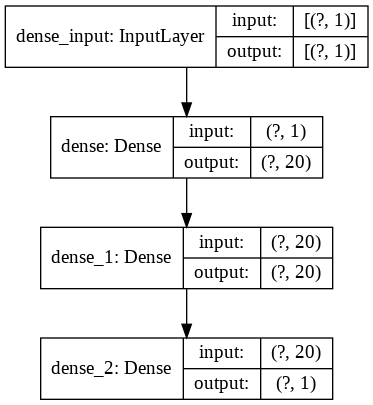

In [5]:
tf.keras.utils.plot_model(model, show_shapes=True)

## 모델 훈련

In [6]:
model.compile(optimizer='adam',
              loss='mae',
              metrics=['mae'])

model.fit(inputs, outputs, epochs=50)

Epoch 1/50
313/313 [==============================] - 0s 1ms/step - loss: 0.4531 - mae: 0.4531
Epoch 2/50
313/313 [==============================] - 0s 1ms/step - loss: 0.2497 - mae: 0.2497
Epoch 3/50
313/313 [==============================] - 0s 1ms/step - loss: 0.2146 - mae: 0.2146
Epoch 4/50
313/313 [==============================] - 0s 1ms/step - loss: 0.1916 - mae: 0.1916
Epoch 5/50
313/313 [==============================] - 0s 1ms/step - loss: 0.1755 - mae: 0.1755
Epoch 6/50
313/313 [==============================] - 0s 1ms/step - loss: 0.1646 - mae: 0.1646
Epoch 7/50
313/313 [==============================] - 0s 1ms/step - loss: 0.1541 - mae: 0.1541
Epoch 8/50
313/313 [==============================] - 0s 1ms/step - loss: 0.1446 - mae: 0.1446
Epoch 9/50
313/313 [==============================] - 0s 1ms/step - loss: 0.1355 - mae: 0.1355
Epoch 10/50
313/313 [==============================] - 0s 1ms/step - loss: 0.1254 - mae: 0.1254
Epoch 11/50
313/313 [============================

In [7]:
test_loss, test_mae = test_output_pred = model.evaluate(inputs, outputs, verbose=0)
print('Test MSE:', test_mae)

Test MSE: 0.04413985833525658


## 테스트

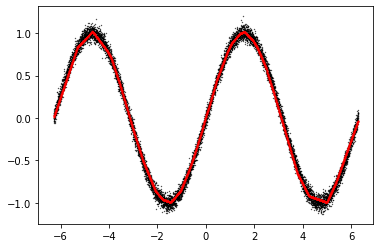

In [8]:
test_output_pred = model.predict(inputs)

plt.scatter(inputs[:, 0], outputs[:, 0], c='k', marker='o', s=0.1)
plt.scatter(inputs[:, 0], test_output_pred[:, 0], c='r', marker='o', s=0.1)